In [1]:
import pandas as pd
import numpy as np
import pyspark as ps

#### Data Path

In [2]:
path = './Social_Media_Advertising.csv'

#### Dataset 

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.functions import when
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Descriptive Statistics for the Social Media Advertising dataset") \
    .getOrCreate()

In [5]:
df = spark.read.csv(path, header=True, inferSchema=True)

# Show the schema to verify column data types
df.printSchema()

# Show the first few rows of the DataFrame
df.show()

root
 |-- Campaign_ID: integer (nullable = true)
 |-- Target_Audience: string (nullable = true)
 |-- Campaign_Goal: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Channel_Used: string (nullable = true)
 |-- Conversion_Rate: double (nullable = true)
 |-- Acquisition_Cost: string (nullable = true)
 |-- ROI: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Language: string (nullable = true)
 |-- Clicks: integer (nullable = true)
 |-- Impressions: integer (nullable = true)
 |-- Engagement_Score: integer (nullable = true)
 |-- Customer_Segment: string (nullable = true)
 |-- Date: date (nullable = true)
 |-- Company: string (nullable = true)

+-----------+---------------+----------------+--------+------------+---------------+----------------+-------------------+-----------+--------+------+-----------+----------------+----------------+----------+--------------+
|Campaign_ID|Target_Audience|   Campaign_Goal|Duration|Channel_Used|Conversion_Rate|Acqui

### Data Description
- **1.	Campaign_ID:**
Type: Integer
Description: A unique identifier for each advertising campaign.
- **2.	Target_Audience:**
Type: String
Description: Describes the demographic group targeted by the campaign. Examples include age and gender, such as "Men 35-44" or "Women 45-60."
- **3.	Campaign_Goal:**
Type: String
Description: The objective of the campaign, which could be Product Launch, Increase Sales, Market Expansion, or Brand Awareness.
- **4.	Duration:**
Type: String
Description: The length of time (in days) that the campaign was active. In this dataset, all campaigns lasted 15 days.
- **5.	Channel_Used:**
Type: String
Description: The platform or marketing channel used for the campaign, such as Facebook, Instagram, Twitter, or Pinterest.
- **6.	Conversion_Rate:**
Type: Float
Description: The percentage of people who took the desired action (e.g., making a purchase, signing up) after seeing the advertisement. It is represented as a decimal (e.g., 0.15 means 15%).
- **7.	Acquisition_Cost:**
Type: Float (in USD)
Description: The cost incurred to acquire a customer or lead during the campaign. It represents the average cost to convert a user into a customer.
- **8.	ROI (Return on Investment):**
Type: Float
Description: The return on investment for the campaign, calculated as the ratio of profit gained from the campaign to the cost of running the campaign. Higher ROI indicates better performance.
- **9.	Location:**
Type: String
Description: The geographical location where the campaign was primarily run. Examples include Miami, Los Angeles, and Austin.
- **10.	Language:**
Type: String
Description: The language used in the campaign advertisement, such as English, Spanish, or French.
- **11.	Clicks:**
Type: Integer
Description: The number of times users clicked on the advertisement during the campaign.
- **12.	Impressions:**
Type: Integer
Description: The number of times the advertisement was shown to users (whether clicked or not) during the campaign.
- **13.	Engagement_Score:**
Type: Integer
Description: A score that reflects how engaging the advertisement was, based on factors like user interactions, shares, and comments. Higher scores indicate more engagement.
- **14.	Customer_Segment:**
Type: String
Description: The business sector or type of customer targeted by the campaign, such as Technology, Food, Fashion, Health, etc.
- **15.	Date:**
Type: Date (MM/DD/YYYY)
Description: The starting date of the campaign.
- **16.	Company:**
Type: String
Description: The name of the company running the advertising campaign, such as Aura Align, Cyber Circuit, or Hearth Harmony.


#### Descriptive Statistics

In [6]:
from pyspark.sql.functions import col, mean, stddev, min, max, count, avg
from pyspark.sql.functions import regexp_replace


In [7]:
# Remove dollar sign or any non-numeric characters, then cast to float
data = df.withColumn("Acquisition_Cost", regexp_replace(col("Acquisition_Cost"), "[$,]", "").cast("float"))

# 1. Basic statistics for numerical columns
numeric_stats = data.describe(["Conversion_Rate", "Acquisition_Cost", "ROI", "Clicks", "Impressions", "Engagement_Score"])
numeric_stats.show()

+-------+-------------------+-----------------+------------------+------------------+------------------+------------------+
|summary|    Conversion_Rate| Acquisition_Cost|               ROI|            Clicks|       Impressions|  Engagement_Score|
+-------+-------------------+-----------------+------------------+------------------+------------------+------------------+
|  count|             300000|           300000|            300000|            300000|            300000|            300000|
|   mean|0.08000939999999163|7753.750796879171|3.1776914383612453|       18153.67037|56034.236386666664|4.3692166666666665|
| stddev|0.04056333397195315| 4301.03514865855|2.4612003515296843|11027.023293960608| 32583.13633449267|3.1564920821268956|
|    min|               0.01|            500.0|               0.0|               293|              1937|                 1|
|    max|               0.15|          15000.0|               8.0|             40000|            120000|                10|
+-------

In [8]:
# 1. Calculate overall ROI statistics
roi_stats = df.select(
    avg("ROI").alias("Average_ROI"),
    max("ROI").alias("Max_ROI"),
    min("ROI").alias("Min_ROI")
)
roi_stats.show()

+------------------+-------+-------+
|       Average_ROI|Max_ROI|Min_ROI|
+------------------+-------+-------+
|3.1776914383612453|    8.0|    0.0|
+------------------+-------+-------+



In [9]:
# 3. Group by Channel and calculate ROI statistics
channel_grouped = df.groupBy("Channel_Used").agg(
    avg("ROI").alias("Average_ROI"),
    max("ROI").alias("Max_ROI"),
    min("ROI").alias("Min_ROI")
)
channel_grouped.show()

+------------+------------------+-----------------+-------+
|Channel_Used|       Average_ROI|          Max_ROI|Min_ROI|
+------------+------------------+-----------------+-------+
|   Instagram| 4.008785901652444|              8.0|    0.0|
|     Twitter| 4.002236212878247|              8.0|    0.0|
|   Pinterest|0.7164312552725385|1.429978109360805|    0.0|
|    Facebook| 3.986929514129103|              8.0|    0.0|
+------------+------------------+-----------------+-------+



In [10]:
# 4. Group by Campaign Goal and calculate ROI statistics
channel_grouped = df.groupBy("Campaign_Goal").agg(
    avg("ROI").alias("Average_ROI"),
    max("ROI").alias("Max_ROI"),
    min("ROI").alias("Min_ROI")
)
channel_grouped.show()

+----------------+------------------+-------+-------+
|   Campaign_Goal|       Average_ROI|Max_ROI|Min_ROI|
+----------------+------------------+-------+-------+
|  Increase Sales| 3.178511447311569|    8.0|    0.0|
|Market Expansion|3.1695488235808362|    8.0|    0.0|
| Brand Awareness| 3.172683694061907|    8.0|    0.0|
|  Product Launch| 3.190007660545188|    8.0|    0.0|
+----------------+------------------+-------+-------+



In [11]:
# 5. Group by Target Audience and calculate ROI statistics
channel_grouped = df.groupBy("Target_Audience").agg(
    avg("ROI").alias("Average_ROI"),
    max("ROI").alias("Max_ROI"),
    min("ROI").alias("Min_ROI")
).orderBy("Average_ROI")
channel_grouped.show()

+---------------+------------------+-------+-------+
|Target_Audience|       Average_ROI|Max_ROI|Min_ROI|
+---------------+------------------+-------+-------+
|      Men 25-34| 3.159558811391634|    8.0|    0.0|
|      Men 35-44|3.1600775441448086|    8.0|    0.0|
|    Women 18-24|3.1633960776703103|    8.0|    0.0|
|      Men 45-60| 3.169174895865937|    8.0|    0.0|
|    Women 25-34| 3.176879651745619|    8.0|    0.0|
|    Women 35-44|3.1780006217039714|    8.0|    0.0|
|    Women 45-60|3.1858815001321004|    8.0|    0.0|
|      Men 18-24| 3.195236046648315|    8.0|    0.0|
|       All Ages|3.2111334161457346|    8.0|    0.0|
+---------------+------------------+-------+-------+



In [12]:
# 2. Conversion Rate & ROI Analysis by Channel and Target Audience
channel_target_stats = df.groupBy("Channel_Used", "Target_Audience").agg(
    mean("Conversion_Rate").alias("Avg_Conversion_Rate"),
    mean("ROI").alias("Avg_ROI")
)
channel_target_stats.show()

+------------+---------------+-------------------+------------------+
|Channel_Used|Target_Audience|Avg_Conversion_Rate|           Avg_ROI|
+------------+---------------+-------------------+------------------+
|   Pinterest|      Men 35-44|0.08018798334324817|0.7123955711819411|
|     Twitter|      Men 25-34|0.08044101433296595|4.0394634325615595|
|     Twitter|      Men 45-60|0.08134117082533603| 4.004306621880999|
|   Pinterest|      Men 18-24|0.08034583181652724|0.7194342026256219|
|    Facebook|    Women 45-60|0.07923512080141443| 4.004672952268709|
|    Facebook|      Men 25-34|0.07926108374384251|3.9384596900156215|
|   Pinterest|    Women 18-24|0.08037306428906629|0.7177855979796807|
|    Facebook|      Men 35-44|0.07968915662650612|3.9863638554216867|
|   Pinterest|    Women 25-34|0.08009953872299114|0.7224841587456567|
|    Facebook|    Women 18-24|0.07945044510385767|3.9856474777448074|
|   Instagram|    Women 45-60|0.07945857952490064| 4.011947425539609|
|    Facebook|      

#### Visualisations

C:\Users\risha\AppData\Local\Temp\ipykernel_38856\2865336394.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  impressions_pivot = impressions_heatmap.pivot("Target_Audience", "Channel_Used", "Avg_Impressions")
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.draw()


IndexError: index 2 is out of bounds for axis 0 with size 2

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


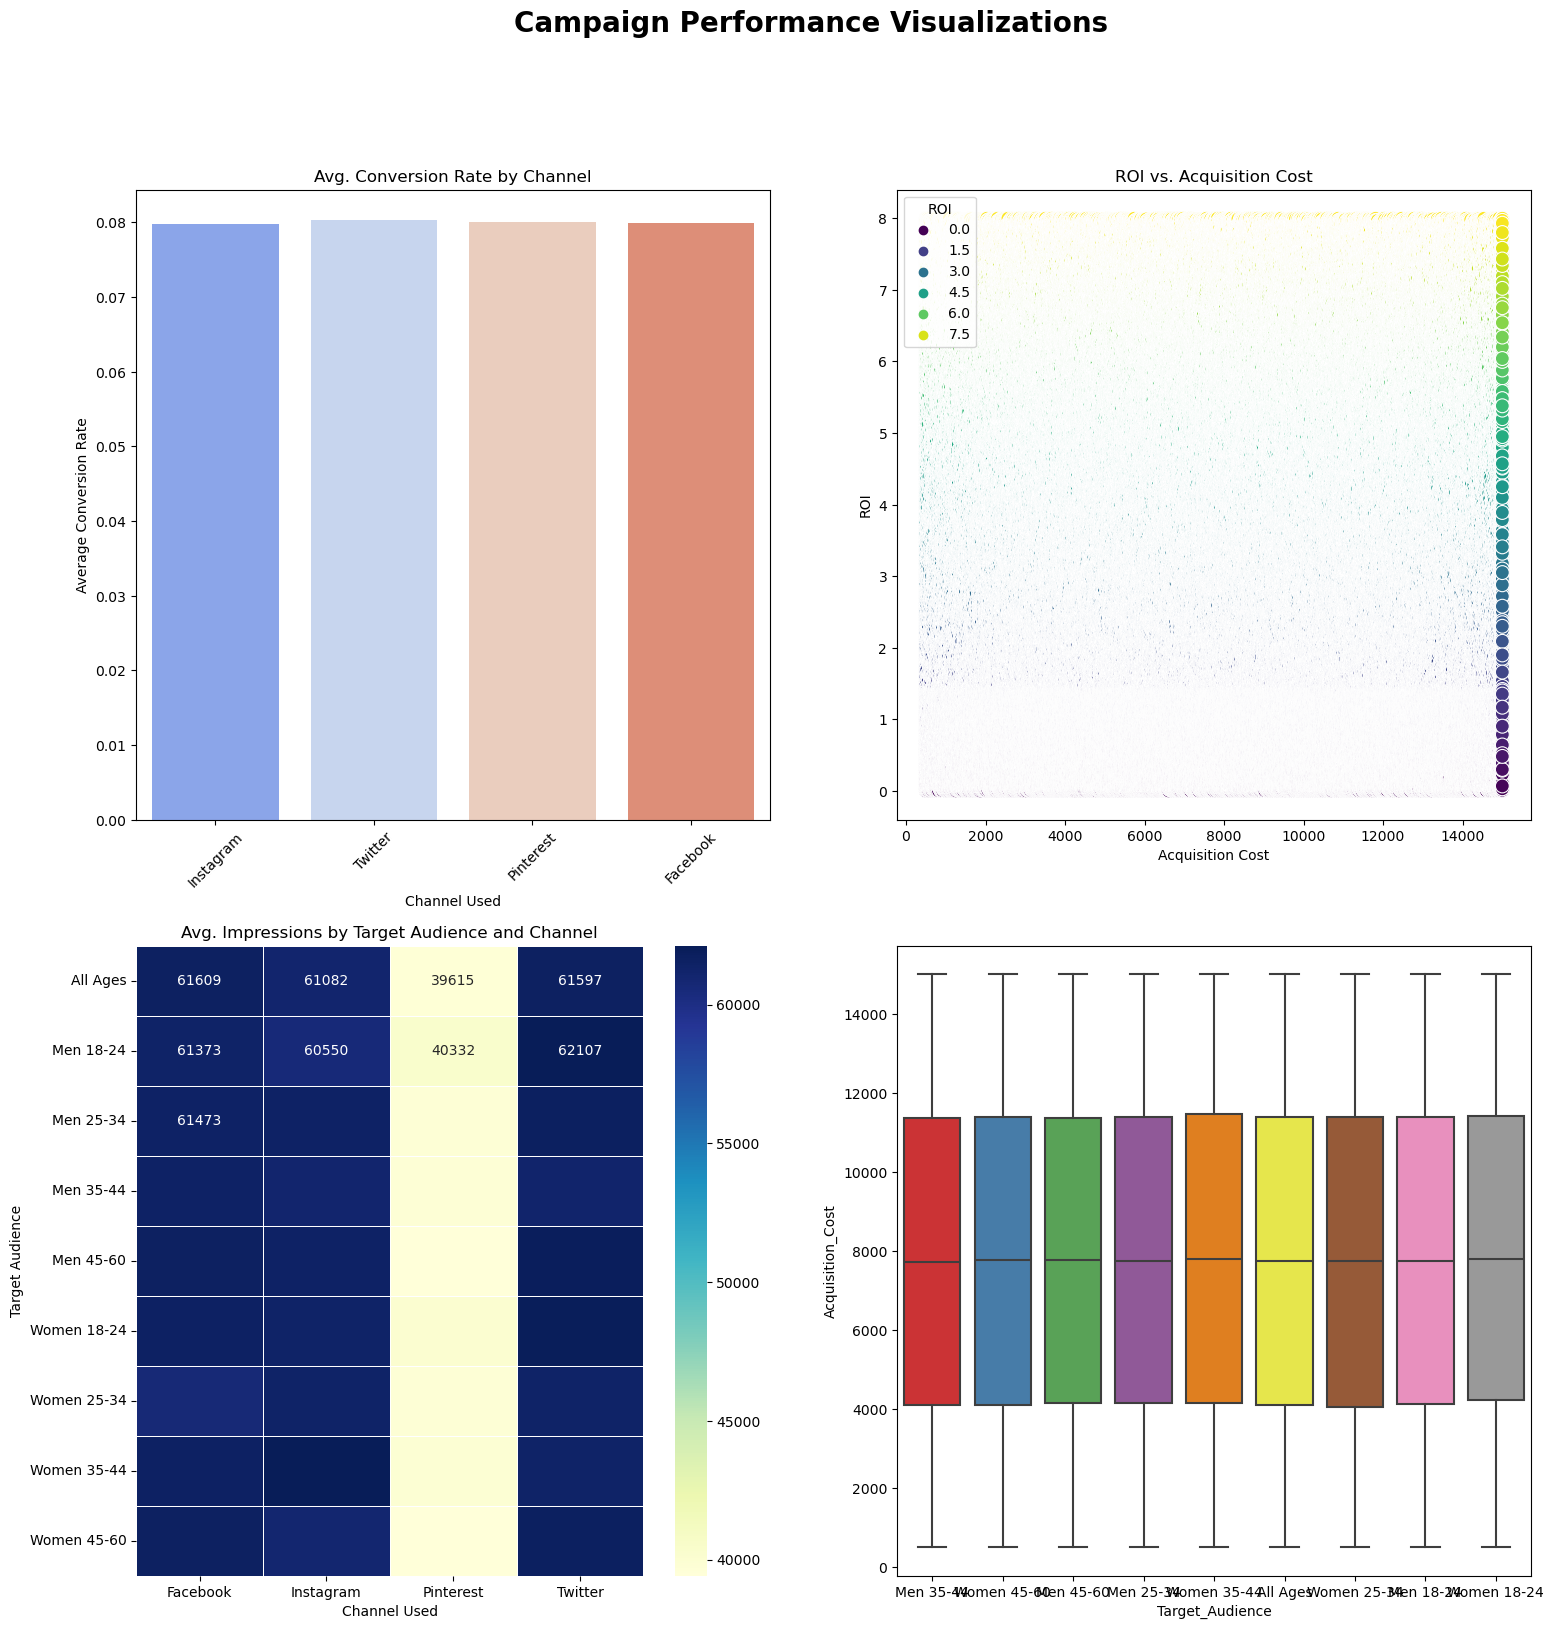

In [12]:
# Convert relevant data to Pandas for plotting
avg_conversion_by_channel = data.groupBy("Channel_Used").agg(mean("Conversion_Rate").alias("Avg_Conversion_Rate")).toPandas()
data_pd = data.toPandas()
data_pd["Date"] = pd.to_datetime(data_pd["Date"])
impressions_heatmap = data.groupBy("Target_Audience", "Channel_Used").agg(mean("Impressions").alias("Avg_Impressions")).toPandas()
impressions_pivot = impressions_heatmap.pivot("Target_Audience", "Channel_Used", "Avg_Impressions")

# Set up a 3x2 grid for plots
fig, axes = plt.subplots(2, 2, figsize=(18, 18))
fig.suptitle('Campaign Performance Visualizations', fontsize=20, weight='bold')

# Plot 1: Average Conversion Rate by Channel
sns.barplot(data=avg_conversion_by_channel, x="Channel_Used", y="Avg_Conversion_Rate", palette="coolwarm", ax=axes[0, 0])
axes[0, 0].set_title("Avg. Conversion Rate by Channel")
axes[0, 0].set_xlabel("Channel Used")
axes[0, 0].set_ylabel("Average Conversion Rate")
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: ROI vs. Acquisition Cost Scatter Plot
sns.scatterplot(data=data_pd, x="Acquisition_Cost", y="ROI", hue="ROI", palette="viridis", s=100, ax=axes[0, 1])
axes[0, 1].set_title("ROI vs. Acquisition Cost")
axes[0, 1].set_xlabel("Acquisition Cost")
axes[0, 1].set_ylabel("ROI")

# Plot 3: Impressions by Target Audience and Channel
sns.heatmap(impressions_pivot, annot=True, cmap="YlGnBu", fmt=".0f", linewidths=.5, ax=axes[1, 0])
axes[1, 0].set_title("Avg. Impressions by Target Audience and Channel")
axes[1, 0].set_xlabel("Channel Used")
axes[1, 0].set_ylabel("Target Audience")


# Plot 6: Box Plot of Acquisition Cost by Target Audience
sns.boxplot(data=data_pd, x="Target_Audience", y="Acquisition_Cost", palette="Set1", ax=axes[1, 1])
axes[2, 1].set_title("Acquisition Cost Distribution by Target Audience")
axes[2, 1].set_xlabel("Target Audience")
axes[2, 1].set_ylabel("Acquisition Cost")
axes[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()


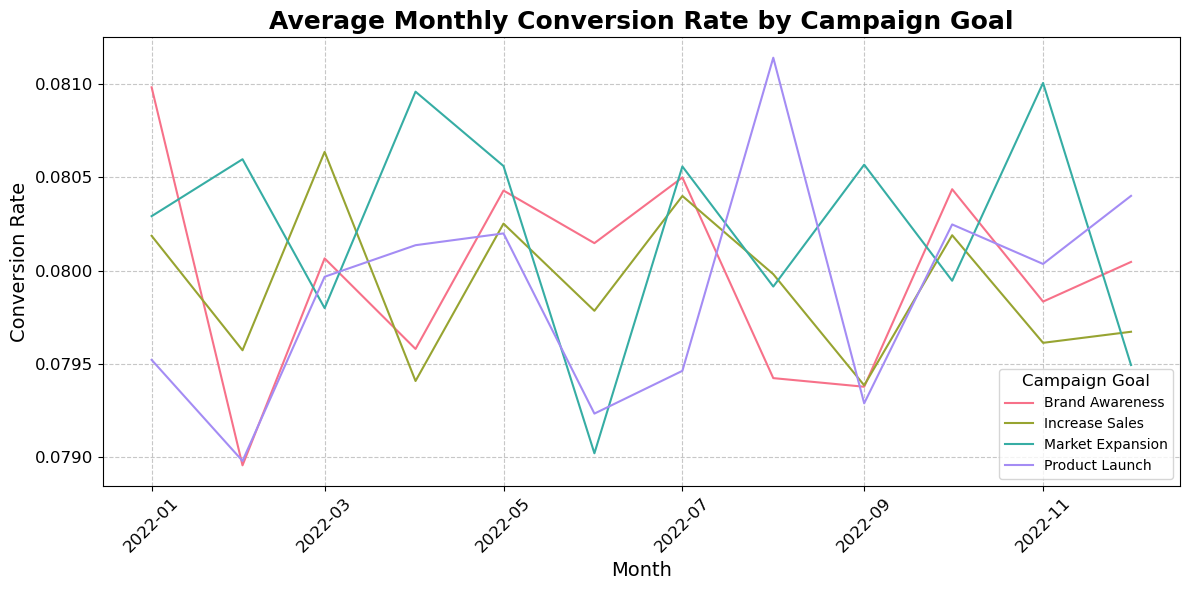

In [15]:
# Convert PySpark DataFrame to Pandas for plotting
data_pd = data.toPandas()

# Ensure 'Date' is in datetime format
data_pd['Date'] = pd.to_datetime(data_pd['Date'])

# Group the data by month and campaign goal for aggregation
data_pd['Month'] = data_pd['Date'].dt.to_period('M')
monthly_data = data_pd.groupby(['Month', 'Campaign_Goal'], as_index=False).agg(
    Conversion_Rate=('Conversion_Rate', 'mean')
)

# Convert 'Month' back to datetime for plotting
monthly_data['Month'] = monthly_data['Month'].dt.to_timestamp()

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x="Month", y="Conversion_Rate", hue="Campaign_Goal", palette="husl")

# Enhance plot aesthetics
plt.title("Average Monthly Conversion Rate by Campaign Goal", fontsize=18, weight='bold')
plt.xlabel("Month", fontsize=14)
plt.ylabel("Conversion Rate", fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(title="Campaign Goal", fontsize=10, title_fontsize=12)
plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


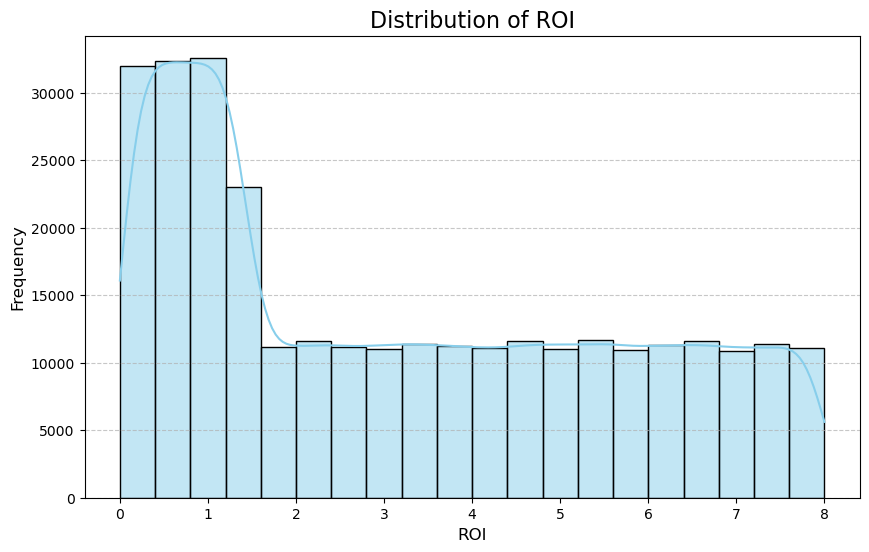

In [14]:
# 1. Distribution of ROI
plt.figure(figsize=(10, 6))
sns.histplot(data_pd["ROI"], kde=True, bins=20, color="skyblue")
plt.title("Distribution of ROI", fontsize=16)
plt.xlabel("ROI", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



We can see that most of the **ROI** is between **0** and **2** with **8** being the highest and 0 being the lowest.

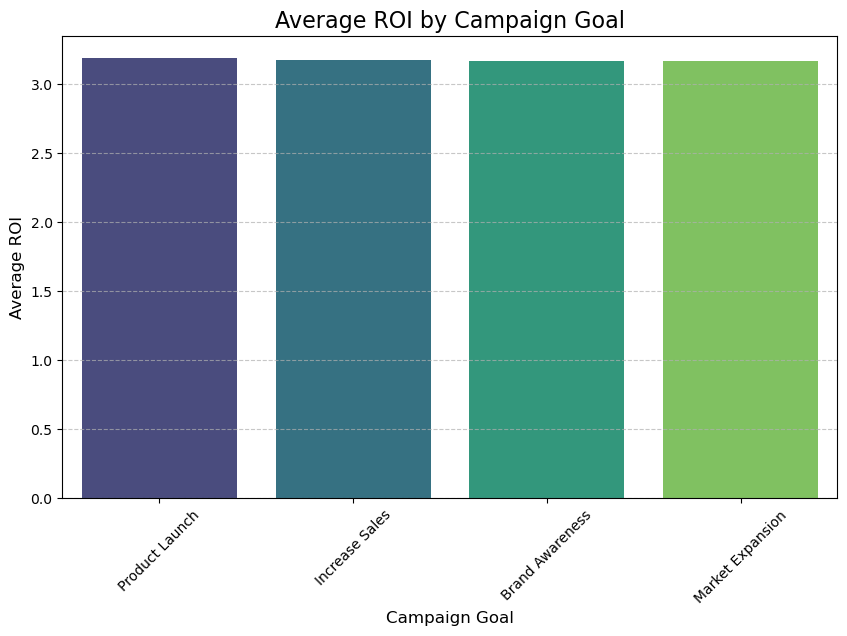

In [17]:
from pyspark.sql import functions as F

# 1. Calculate Average ROI by Campaign Goal
avg_roi_by_goal = df.groupBy("Campaign_Goal").agg(F.avg("ROI").alias("Average_ROI"))

# 2. Convert to Pandas DataFrame for Visualization
avg_roi_by_goal_pd = avg_roi_by_goal.orderBy(F.desc("Average_ROI")).toPandas()

# 3. Plot the Data
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_roi_by_goal_pd["Campaign_Goal"], y=avg_roi_by_goal_pd["Average_ROI"], palette="viridis")
plt.title("Average ROI by Campaign Goal", fontsize=16)
plt.xlabel("Campaign Goal", fontsize=12)
plt.ylabel("Average ROI", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


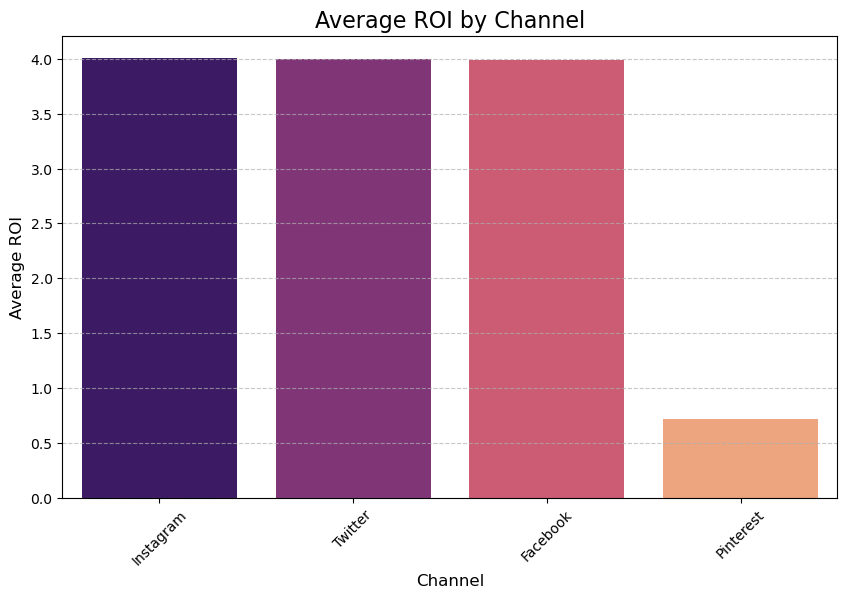

In [23]:
# 1. Calculate Average ROI by Channel
avg_roi_by_channel = df.groupBy("Channel_Used").agg(F.avg("ROI").alias("Average_ROI"))

# 2. Convert to Pandas DataFrame for Visualization
avg_roi_by_channel_pd = avg_roi_by_channel.orderBy(F.desc("Average_ROI")).toPandas()

# 3. Plot the Data
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_roi_by_channel_pd["Channel_Used"], y=avg_roi_by_channel_pd["Average_ROI"], palette="magma")
plt.title("Average ROI by Channel", fontsize=16)
plt.xlabel("Channel", fontsize=12)
plt.ylabel("Average ROI", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Here we see the channel **Pinterest** has the least performance in attracting customers.

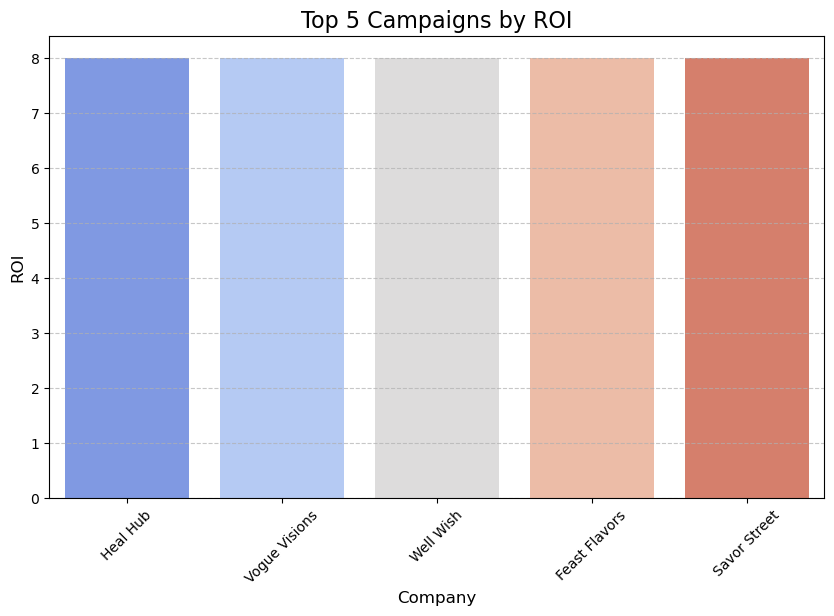

In [24]:
# 4. Top 5 Campaigns by ROI

# 1. Get Top 5 Campaigns by ROI
top_campaigns = df.orderBy(F.desc("ROI")).limit(5).toPandas()

# 2. Plot the Data
plt.figure(figsize=(10, 6))
sns.barplot(x=top_campaigns["Company"], y=top_campaigns["ROI"], palette="coolwarm")
plt.title("Top 5 Campaigns by ROI", fontsize=16)
plt.xlabel("Company", fontsize=12)
plt.ylabel("ROI", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

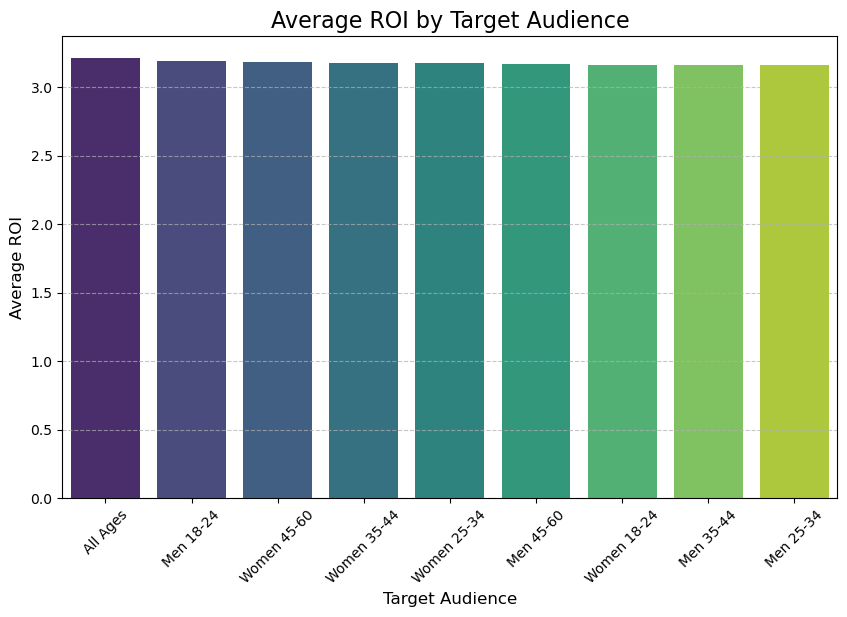

In [25]:
#5. Calculate ROI according to Target Audience

# 1. Calculate Average ROI by Target Audience
avg_roi_by_target_audience = df.groupBy("Target_Audience").agg(F.avg("ROI").alias("Average_ROI"))

# 2. Convert to Pandas DataFrame for Visualization
avg_roi_by_target_audience_pd = avg_roi_by_target_audience.orderBy(F.desc("Average_ROI")).toPandas()

# 3. Plot the Data
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_roi_by_target_audience_pd["Target_Audience"], 
            y=avg_roi_by_target_audience_pd["Average_ROI"], 
            palette="viridis")
plt.title("Average ROI by Target Audience", fontsize=16)
plt.xlabel("Target Audience", fontsize=12)
plt.ylabel("Average ROI", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [19]:
data.show()

+-----------+---------------+----------------+--------+------------+---------------+----------------+-------------------+-----------+--------+------+-----------+----------------+----------------+----------+--------------+
|Campaign_ID|Target_Audience|   Campaign_Goal|Duration|Channel_Used|Conversion_Rate|Acquisition_Cost|                ROI|   Location|Language|Clicks|Impressions|Engagement_Score|Customer_Segment|      Date|       Company|
+-----------+---------------+----------------+--------+------------+---------------+----------------+-------------------+-----------+--------+------+-----------+----------------+----------------+----------+--------------+
|     529013|      Men 35-44|  Product Launch| 15 Days|   Instagram|           0.15|           500.0|               5.79|  Las Vegas| Spanish|   500|       3000|               7|          Health|2022-02-25|    Aura Align|
|     275352|    Women 45-60|Market Expansion| 15 Days|    Facebook|           0.01|           500.0|           

### Predicting the ROI

In [8]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.classification import LinearSVC
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.ml.regression import RandomForestRegressor


# Handle missing values if any
data = data.dropna()

# Convert categorical columns to numeric using StringIndexer and OneHotEncoder
indexer_channel = StringIndexer(inputCol="Channel_Used", outputCol="Channel_Idx")
indexer_location = StringIndexer(inputCol="Location", outputCol="Location_Idx")
indexer_language = StringIndexer(inputCol="Language", outputCol="Language_Idx")
indexer_segment = StringIndexer(inputCol="Customer_Segment", outputCol="Segment_Idx")
indexer_campaign = StringIndexer(inputCol="Campaign_Goal", outputCol="Campaign_Idx")
indexer_Audience = StringIndexer(inputCol="Target_Audience", outputCol="Audience_Idx")

# Assemble the features into a single vector
assembler = VectorAssembler(inputCols=["Channel_Idx", "Location_Idx", "Language_Idx", "Segment_Idx", "Campaign_Idx", "Audience_Idx", "Clicks", "Impressions", "Engagement_Score", "Acquisition_Cost", "Conversion_Rate"], outputCol="features")



In [10]:
# Initialize the SVM model (LinearSVC)
rf = RandomForestRegressor(featuresCol="features", labelCol="ROI")

# Create a pipeline for preprocessing and model training
pipeline = Pipeline(stages=[indexer_channel, indexer_location, indexer_language, indexer_segment, indexer_campaign, indexer_Audience, assembler, rf])

# Split the data into training and test sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Fit the model
model = pipeline.fit(train_data)

# Make predictions
predictions = model.transform(test_data)



In [12]:
from sklearn.metrics import mean_absolute_error

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="ROI", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) on test data = {rmse}")

# Initialize the RegressionEvaluator for MAE
mae_evaluator = RegressionEvaluator(labelCol="ROI", predictionCol="prediction", metricName="mae")

# Calculate MAE on the test data
mae = mae_evaluator.evaluate(predictions)

print(f"Mean Absolute Error (MAE) on test data = {mae}")


Root Mean Squared Error (RMSE) on test data = 2.0093048765825094
Mean Absolute Error (MAE) on test data = 1.5862726156019717


In [13]:
from pyspark.ml.evaluation import RegressionEvaluator

# Initialize the RegressionEvaluator for R²
r2_evaluator = RegressionEvaluator(labelCol="ROI", predictionCol="prediction", metricName="r2")

# Calculate R² on the test data
r2 = r2_evaluator.evaluate(predictions)

print(f"R² (Coefficient of Determination) on test data = {r2}")


R² (Coefficient of Determination) on test data = 0.3346278371844911


**Linear Regression**

In [31]:
# Import necessary PySpark libraries
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator


# Create a Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="ROI", maxIter=100, regParam=0.1, elasticNetParam=0.8)

# Create a pipeline for preprocessing and regression
pipeline = Pipeline(stages=[indexer_channel, indexer_location, indexer_language, indexer_segment, indexer_campaign, indexer_Audience, assembler, lr])


# Split the data into training and testing sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Fit the model
model = pipeline.fit(train_data)


# Make predictions
predictions = model.transform(test_data)



In [32]:
# Evaluate the model
evaluator = RegressionEvaluator(labelCol="ROI", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)

print(f"Root Mean Squared Error (RMSE) on test data = {rmse}")

# Additional metric: R-squared
r2_evaluator = RegressionEvaluator(labelCol="ROI", predictionCol="prediction", metricName="r2")
r2 = r2_evaluator.evaluate(predictions)

print(f"R² (Coefficient of Determination) on test data = {r2}")

Root Mean Squared Error (RMSE) on test data = 2.1704588627371306
R² (Coefficient of Determination) on test data = 0.22361690818495727


In [ ]:
# Initialize the RegressionEvaluator for MAE
mae_evaluator = RegressionEvaluator(labelCol="ROI", predictionCol="prediction", metricName="mae")

# Calculate MAE on the test data

mae = mae_evaluator.evaluate(predictions)

print(f"Mean Absolute Error (MAE) on test data = {mae}")

Mean Absolute Error (MAE) on test data = 1.8253043338432462


### Using Deep Learning

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
# Remove dollar sign or any non-numeric characters, then cast to float
data = df.withColumn("Acquisition_Cost", regexp_replace(col("Acquisition_Cost"), "[$,]", "").cast("float"))

In [16]:
# convert the dataset from pySpark to pandas
data_pd = data.toPandas()

In [17]:
# List of categorical columns to apply one-hot encoding on
categorical_columns = ['Target_Audience', 'Campaign_Goal', 'Duration', 'Channel_Used', 'Location', 
                       'Language', 'Customer_Segment', 'Company']

# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse=False)  # sparse=False will return a dense numpy array

# Apply one-hot encoding to the selected categorical columns
encoded_columns = encoder.fit_transform(data_pd[categorical_columns])

# Convert the result back to a DataFrame
encoded_data = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
# Concatenate the original DataFrame with the encoded columns
data_encoded = pd.concat([data_pd.drop(columns=categorical_columns), encoded_data], axis=1)

data_encoded = data_encoded.drop("Date", axis=1)

In [19]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
train_df, test_df = train_test_split(data_encoded, test_size=0.2, random_state=42)

In [20]:
# Split features and target variable
y_train = train_df["ROI"]
X_train = train_df.drop("ROI", axis=1)

y_test = test_df["ROI"]
X_test = test_df.drop("ROI", axis=1)



In [21]:
import numpy as np

# Convert features to float32
X_train = np.array(X_train).astype('float32')
y_train = np.array(y_train).astype('float32')  # If regression, ensure labels are floats

X_test = np.array(X_test).astype('float32')
y_test = np.array(y_test).astype('float32')


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer 1
    Dense(16, activation='relu'),  # Hidden layer 2
    Dense(1, activation='linear')  # Output layer (linear activation for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


C:\Users\risha\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 641us/step - loss: 36237352.0000 - mae: 810.7137 - val_loss: 8471.0449 - val_mae: 84.1133
Epoch 2/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 4s 676us/step - loss: 9703.3301 - mae: 44.7608 - val_loss: 1238.7026 - val_mae: 31.5716
Epoch 3/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 781us/step - loss: 4037.8777 - mae: 30.1482 - val_loss: 32.3011 - val_mae: 4.9351
Epoch 4/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 756us/step - loss: 2214.8745 - mae: 15.6318 - val_loss: 9.7876 - val_mae: 2.4611
Epoch 5/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 5s 884us/step - loss: 162.4734 - mae: 6.7968 - val_loss: 7.5123 - val_mae: 2.2149
Epoch 6/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 22.3735 - mae: 3.1427 - val_loss: 6.2241 - val_mae: 2.0659
Epoch 7/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 6.3654 - mae: 1.9571 - val_loss: 8.0480 - val_mae: 2.2346
Epoch 8/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 7.1767 - mae: 2.1848 - val_loss: 6.0556 - val_mae: 2.

In [24]:
import numpy as np

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Make predictions
y_pred = model.predict(X_test)

Mean Absolute Error (MAE): 2.18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 330us/step


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluate the model on the test set (MAE and other metrics are already calculated here)
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Make predictions
y_pred = model.predict(X_test)



Mean Absolute Error (MAE): 2.18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 328us/step
R² (Coefficient of Determination): -0.00


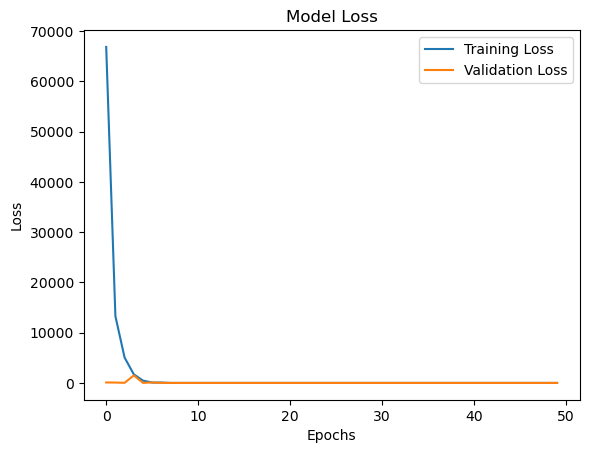

In [55]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()


### Using LSTM

In [68]:
# List of categorical columns to encode
categorical_columns = ['Target_Audience', 'Campaign_Goal', 'Duration', 'Channel_Used', 'Location', 
                       'Language', 'Customer_Segment', 'Company']

# Dictionary to store the mappings
encoding_maps = {}

# Encoding each categorical column manually
for col in categorical_columns:
    unique_values = data_pd[col].unique()
    encoding_map = {value: idx for idx, value in enumerate(unique_values)}
    encoding_maps[col] = encoding_map
    data_pd[col] = data_pd[col].map(encoding_map)



# Print the mappings for reference
for col, mapping in encoding_maps.items():
    print(f"Encoding for {col}: {mapping}")

data_pd

Encoding for Target_Audience: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}
Encoding for Campaign_Goal: {0: 0, 1: 1, 2: 2, 3: 3}
Encoding for Duration: {0: 0, 1: 1, 2: 2, 3: 3}
Encoding for Channel_Used: {0: 0, 1: 1, 2: 2, 3: 3}
Encoding for Location: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
Encoding for Language: {0: 0, 1: 1, 2: 2}
Encoding for Customer_Segment: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
Encoding for Company: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49}


,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company
0,529013,0,0,0,0,0.15,500.0,5.790000,0,0,500,3000,7,0,2022-02-25,0
1,275352,1,1,0,1,0.01,500.0,7.210000,1,1,500,3000,5,1,2022-05-12,1
2,692322,2,0,0,0,0.08,500.0,0.430000,2,0,500,3000,9,2,2022-06-19,2
3,675757,3,2,0,2,0.03,500.0,0.909824,3,0,293,1937,1,0,2022-09-08,3
4,535900,2,1,0,2,0.13,500.0,1.422828,2,1,293,1937,1,1,2022-08-24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,565525,3,1,3,0,0.14,15000.0,4.950000,1,2,39999,119998,7,2,2022-10-17,47
299996,539680,6,1,3,0,0.08,15000.0,3.410000,2,0,39999,119998,8,2,2022-02-25,40
299997,140032,4,3,3,2,0.09,15000.0,0.904461,3,1,23492,77476,1,3,2022-10-02,16
299998,161067,8,1,3,0,0.13,15000.0,7.430000,0,0,39999,119999,10,3,2022-01-24,24


In [69]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
train_lstm, test_lstm = train_test_split(data_encoded, test_size=0.2, random_state=42)

In [70]:
# Split features and target variable
y_train = train_df["ROI"]
X_train = train_df.drop("ROI", axis=1)

y_test = test_df["ROI"]
X_test = test_df.drop("ROI", axis=1)

In [71]:
# Reshape to (samples, timesteps, features)
X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2)



C:\Users\risha\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 5580900.5000 - mae: 425.9892 - val_loss: 35.2496 - val_mae: 4.9855
Epoch 2/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 483.3538 - mae: 11.4416 - val_loss: 53.7283 - val_mae: 6.1155
Epoch 3/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 529.4232 - mae: 9.6478 - val_loss: 10.9250 - val_mae: 2.7356
Epoch 4/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 767.1909 - mae: 11.2752 - val_loss: 4.4203 - val_mae: 1.6715
Epoch 5/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 451.4783 - mae: 10.6515 - val_loss: 4.5808 - val_mae: 1.6882
Epoch 6/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 468.7747 - mae: 10.5378 - val_loss: 385.8709 - val_mae: 17.8277
Epoch 7/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 512.4113 - mae: 11.4654 - val_loss: 23.1489 - val_mae: 4.1383
Epoch 8/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 373.6034 - mae: 9.9921 - val_loss: 39.2179 - val_mae: 5.44

In [73]:
# Evaluate the model
loss, mae = model.evaluate(X_test_reshaped, y_test)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Make predictions
y_pred = model.predict(X_test_reshaped)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 6.0668 - mae: 2.1791
Mean Absolute Error (MAE): 2.18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


### Conclusion
In this paper we used 3 types of Machine Learning algorithms, in regression, small neural network and LSTM(Long Short Term Memory) model, and we see that for each model, the peeformance doesn't exceed the **75%** mark.Even after the encoding the data for each categorical column. We have to see how to use deeper models in future to increase the prediction accuracy for the dataset.